Cervical cancer classification using machine learning methods 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("C:/Users/rid/Downloads/archive (5)/cervical-cancer_csv.csv")
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
df1 = df.iloc[:, :12]
df2 = df.iloc[:, -4:]

df = pd.concat([df1, df2], axis="columns")

In [5]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [6]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype(int)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0
831,32,2,19,1,0,0,0,1,8,0,0,0,0,0,0,0
832,25,2,17,0,0,0,0,1,0,0,0,0,0,0,1,0
833,33,2,24,2,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
corr = df.corr()['Biopsy'].abs().sort_values(ascending=False)

k = 10
selected_features = corr[1:k+1].index.tolist()

new_df = df[selected_features + ['Biopsy']]

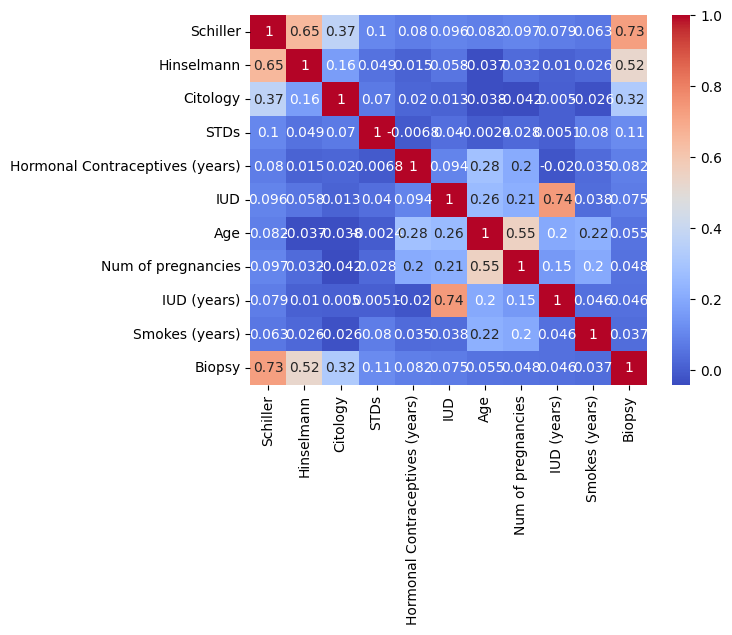

In [8]:
corr = new_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [9]:
df[df["Biopsy"] == 1].shape

(44, 16)

In [10]:
df[df["Biopsy"] == 0].shape

(606, 16)

In [11]:
X = new_df.drop(['Biopsy'], axis="columns")
y = new_df['Biopsy']

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before oversampling: ")
print(y.value_counts())

print("After oversampling: ")
print(y_resampled.value_counts())

Before oversampling: 
Biopsy
0    606
1     44
Name: count, dtype: int64
After oversampling: 
Biopsy
0    606
1    606
Name: count, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=64)

Logistic regression model

In [13]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

lr = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_resampled, y_resampled)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.9478042237104202


c:\Users\rid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\rid\AppData\Local\Programs\Python\Pytho

In [14]:
regression = LogisticRegression(C=1, penalty='l2', solver='liblinear')
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

0.9423076923076923

In [15]:
print(classification_report(y_test, regression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       178
           1       0.98      0.91      0.94       186

    accuracy                           0.94       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.94      0.94       364



Decision Tree

Accuracy: 0.9752747252747253
Confusion Matrix:
[[169   9]
 [  0 186]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       178
           1       0.95      1.00      0.98       186

    accuracy                           0.98       364
   macro avg       0.98      0.97      0.98       364
weighted avg       0.98      0.98      0.98       364



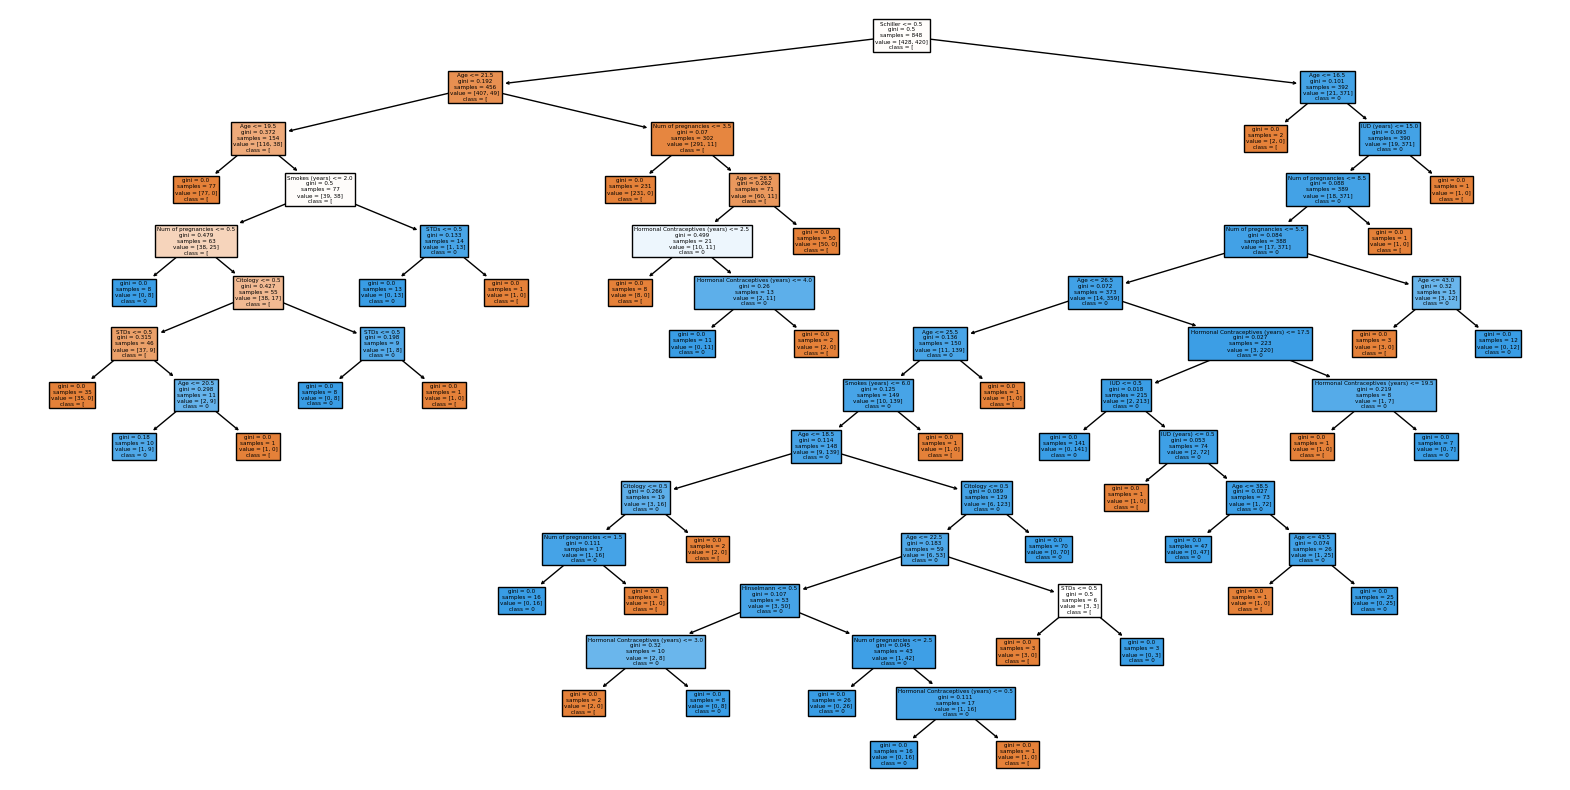

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=str(clf.classes_))
plt.show()


Random forest 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9917582417582418
Confusion Matrix:
[[175   3]
 [  0 186]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       178
           1       0.98      1.00      0.99       186

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



SVM (Support vector machine)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_clf = SVC(random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.6785714285714286
Confusion Matrix:
[[170   8]
 [109  77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.74       178
           1       0.91      0.41      0.57       186

    accuracy                           0.68       364
   macro avg       0.76      0.68      0.66       364
weighted avg       0.76      0.68      0.65       364



#KNN

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_clf.fit(X_train, y_train)

# Make predictions 
y_pred = knn_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9478021978021978
Confusion Matrix:
[[159  19]
 [  0 186]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       178
           1       0.91      1.00      0.95       186

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.95       364
weighted avg       0.95      0.95      0.95       364

